In [1]:
#Dataset
import numpy as np
from matplotlib import pyplot as plt

dataset = [['Year', 'Amt. in Millions', 'Profit in Millions'],
           [1990, 2, 20], [1991, 3, 25], [1992, 5, 34], 
           [1993, 4, 30], [1994, 11, 40], [1995, 5, 31]]

data = np.array(dataset[1:])
print('Dataset Length:', len(data))
print('Dataset shape:', data.shape)
print('Dataset:', data)

Dataset Length: 6
Dataset shape: (6, 3)
Dataset: [[1990    2   20]
 [1991    3   25]
 [1992    5   34]
 [1993    4   30]
 [1994   11   40]
 [1995    5   31]]


x = (2, 3, 4, 5, 5, 11)
y = (20, 25, 30, 31, 34, 40)


Text(0, 0.5, 'Profit in Millions')

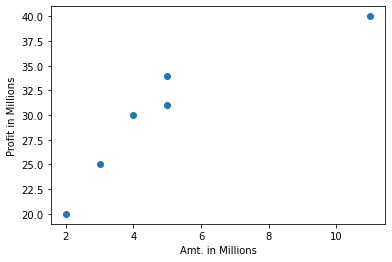

In [2]:
#scattering points
x, y = zip(*sorted(zip(data[:, 1], data[:, 2])))
print(f'x = {x}\ny = {y}')

plt.scatter(x, y)
plt.xlabel(dataset[0][1])
plt.ylabel(dataset[0][2])

x = (2, 3, 4, 5, 5, 11)
y = (20, 25, 30, 31, 34, 40)
profit for 8 million spent on research is 36.0 Millions


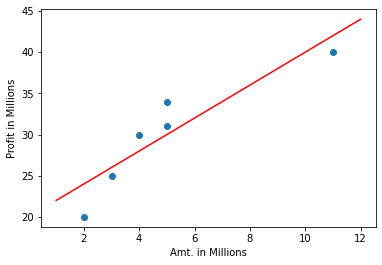

In [3]:
#Linear Regression with one variable 
#using LMS
prod_xy = data[:, 1]*data[:, 2]
square_x = data[:, 1] * data[:, 1]
mean_x = data[:, 1].mean()
mean_y = data[:, 2].mean()

def fun(m, x, c):
    return m*x+c

m = (prod_xy.sum() - len(data)*mean_x*mean_y) / (square_x.sum() - len(data)*mean_x*mean_x)
c = mean_y-m*mean_x

#ploting
data_x = np.linspace(1, 12, 100)
data_y = fun(m, data_x, c)

x, y = zip(*sorted(zip(data[:, 1], data[:, 2])))
print(f'x = {x}\ny = {y}')

plt.scatter(x, y)
plt.plot(data_x, data_y, 'r-')
plt.xlabel(dataset[0][1])
plt.ylabel(dataset[0][2])

#predicting profit for 8 million spent
profit = fun(m, 8, c)
print('profit for 8 million spent on research is',profit, 'Millions')

profit for 8 million spent on research is 36.04401280424861 Millions


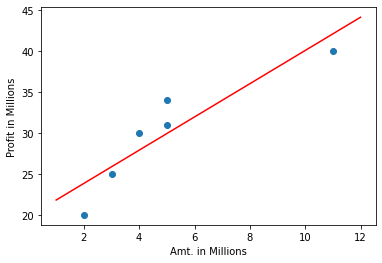

In [4]:
#Gradient descent
import sys

def cost_function(y_pred, y_test):
    square_diff = (y_pred - y_test)*(y_pred - y_test)
    return square_diff.sum() / 2*len(y_pred)

alpha = 0.001
w = [2, 2]

def gradient_descent(y_pred, y_test, x_test):
    error = y_pred-y_test
    prod_yx = error*x_test
    w[0] = w[0] - alpha * (error.sum() / len(y_pred))
    w[1] = w[1] - alpha * (prod_yx.sum() / len(y_pred))
    
prev = sys.maxsize
y_pred = fun(w[1], data[:, 1], w[0])
while prev != round(cost_function(y_pred, data[:, 2]), 4):
    #print('Mean square cost:', cost_function(y_pred, data[:, 2]), 'Weights:', w)
    gradient_descent(y_pred, data[:, 2], data[:, 1])
    prev = round(cost_function(y_pred, data[:, 2]), 4)
    y_pred = fun(w[1], data[:, 1], w[0])

data_y = fun(w[1], data_x, w[0])
plt.scatter(x, y)
plt.plot(data_x, data_y, 'r-')
plt.xlabel(dataset[0][1])
plt.ylabel(dataset[0][2])

#predicting profit for 8 million spent
profit = fun(w[1], 8, w[0])
print('profit for 8 million spent on research is',profit, 'Millions')